### 12.010 PSET 03 Bessel functions

The Bessel functions of the first kind $J_n(x)$ are defined as the solutions to the Bessel differential equation
$$ x^2\frac{d^2y}{dx^2}+x\frac{dy}{dx}+(x^2-n^2)y=0 $$
where $n$ is referred to as the order.  For this problem set $n\geq$0 and $x$ will be real and $x\geq$0. Bessel functions are often encountered in problems involving cyclindical coordinates. 

Bessel functions can be computed from the series expansion:
$$J_n(x)=\sum_{m=0}^{\infty} \frac{(-1)^m}{m!(n+m)!} (\frac{x}{2})^{(n+2m)}$$

The functions can also be solve recursively using the recursive relationship
$$J_{n+1}(x)=\frac{2n}{x}J_n(x)-J_{n-1}(x)$$
so that once $J_0(x)$ and $J_1(x)$ have been generated, all higher order terms can be generated.  
The functions can also be computed from the following integral:
$$ J_n(x)=\frac{1}{\pi} \int_{0}^{\pi} \cos(x \sin\theta - n\theta) d\theta$$
Equations from: https://mathworld.wolfram.com/BesselFunctionoftheFirstKind.html and https://www.math.colostate.edu/~shipman/47/volume2a2010/Sekeljik.pdf



#### Part (1): Issues to be addressed in computing Bessel functions with above formulas

(a) Solving differential equation  
We need to convert the $2^{nd}$ order equation into two first order equations.  We do this by introducing new variable $v=\frac{dy}{dx}$ and the pair of differential equations become
$$ \frac{dy}{dx}=v $$  
$$ \frac{dv}{dx} = \frac{d^2y}{dx^2} = -\frac{v}{x} -\frac{(x^2-n^2)}{x^2} \frac{dy}{dx} $$    
Issues to be addressed here  
1. The behavior when $x=0$
2. Scaling of the Bessel functions i.e., multiplying a function by a constant will still satisfy the differential equation because the RHS is zero.
3. Initial conditions.  To generate Bessel functions of the first kind, initial conditions must be set correctly.  For $J_0$ and $J_1$, the initial conditions, i.e., value and first derivative, are at $x=0$, 1.0,0.0 and 0.0,0.5.  But for $n>1$, the value and derivative at $x=0$ are 0.0,0.0.  Solving the differential equation with these initial conditions will generate a trivial solution $y(x)=0$ for all $x$ values.  Cells below give strategies to solve this problem.

(b) Series summation.
1. For $\frac{x}{2}>1$, the term being taken to the power will approach $\infty$ as $m$ approaches  $\infty$.  The sum converges because of the factorial m and n+m terms.
2.  Care is needed with factorial because this function grows rapidly with increasing which can cause integer overflows in languages like C and Fortran.  In python 3, this will not be problem because the number of bytes in the integer grows as needed.  If the factorial were a float, it can overflow the double precision representation. 

(c) Recursion
1. Only problem here would be the growth of rounding error as the values of n increase.

(d)Integral method
1. Only issue here is assuring that the integral is evaluated accurately enough.

    
    

In [1]:
## PART (2): Use Python special functon jv.  Its derivative jvp will also 
# needed for initial conditions below.
import numpy as np
from scipy.special import jv, jvp
from tabulate import tabulate

# Set the X-values for 0 to 10 in increments of 0.05 for plotting.
# Use these same values in later parts of the PSET.
dx = 0.05
xt = np.arange(0.,10.+dx,dx)
jv_table = np.zeros((np.size(xt),7));
k = 0;
for x in xt:
    jv_table[k] = [x,jv(0,x),jv(1,x),jv(2,x),jv(3,x),jv(4,x),jv(5,x)]
    k += 1

N = int(0.5/dx) # Spacing to have 0.5 output interval

fancy_headers = ["x", "J_0(x)","J_1(x)","J_2(x)0","J_3(x)","J_4(x)","J_5(x)"]
print('\nBessel Function First Kind: scipy.special.')
print(tabulate(jv_table[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))

print('\nPIPE: Paste into Markdown\n\nBessel function of First kind\n')
MD_headers = ["x", "$J_0(x)$","$J_1(x)$","$J_2(x)$","$J_3(x)$","$J_4(x)$","$J_5(x)$"]
print(tabulate(jv_table[0::N], MD_headers, tablefmt="pipe",\
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))



Bessel Function First Kind: scipy.special.
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    x │    J_0(x) │    J_1(x) │   J_2(x)0 │    J_3(x) │    J_4(x) │    J_5(x) │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0.0 │  1.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  0.5 │  0.938470 │  0.242268 │  0.030604 │  0.002564 │  0.000161 │  0.000008 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.0 │  0.765198 │  0.440051 │  0.114903 │  0.019563 │  0.002477 │  0.000250 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.5 │  0.511828 │  0.557937 │  0.232088 │  0.060964 │  0.011768 │  0.001799 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2.0 │  0.223891 │  0.576725 │  0.352834 │  0.128943 │  0.03399

Tables pasted from output above into markdown cell.

PIPE: Paste into Markdown

Bessel function of First kind

|    x |   $J_0(x)$ |   $J_1(x)$ |   $J_2(x)$ |   $J_3(x)$ |   $J_4(x)$ |   $J_5(x)$ |
|-----:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|
|  0.0 |   1.000000 |   0.000000 |   0.000000 |   0.000000 |   0.000000 |   0.000000 |
|  0.5 |   0.938470 |   0.242268 |   0.030604 |   0.002564 |   0.000161 |   0.000008 |
|  1.0 |   0.765198 |   0.440051 |   0.114903 |   0.019563 |   0.002477 |   0.000250 |
|  1.5 |   0.511828 |   0.557937 |   0.232088 |   0.060964 |   0.011768 |   0.001799 |
|  2.0 |   0.223891 |   0.576725 |   0.352834 |   0.128943 |   0.033996 |   0.007040 |
|  2.5 |  -0.048384 |   0.497094 |   0.446059 |   0.216600 |   0.073782 |   0.019502 |
|  3.0 |  -0.260052 |   0.339059 |   0.486091 |   0.309063 |   0.132034 |   0.043028 |
|  3.5 |  -0.380128 |   0.137378 |   0.458629 |   0.386770 |   0.204405 |   0.080442 |
|  4.0 |  -0.397150 |  -0.066043 |   0.364128 |   0.430171 |   0.281129 |   0.132087 |
|  4.5 |  -0.320543 |  -0.231060 |   0.217849 |   0.424704 |   0.348423 |   0.194715 |
|  5.0 |  -0.177597 |  -0.327579 |   0.046565 |   0.364831 |   0.391232 |   0.261141 |
|  5.5 |  -0.006844 |  -0.341438 |  -0.117315 |   0.256118 |   0.396717 |   0.320925 |
|  6.0 |   0.150645 |  -0.276684 |  -0.242873 |   0.114768 |   0.357642 |   0.362087 |
|  6.5 |   0.260095 |  -0.153841 |  -0.307430 |  -0.035347 |   0.274803 |   0.373565 |
|  7.0 |   0.300079 |  -0.004683 |  -0.301417 |  -0.167556 |   0.157798 |   0.347896 |
|  7.5 |   0.266340 |   0.135248 |  -0.230273 |  -0.258061 |   0.023825 |   0.283474 |
|  8.0 |   0.171651 |   0.234636 |  -0.112992 |  -0.291132 |  -0.105357 |   0.185775 |
|  8.5 |   0.041939 |   0.273122 |   0.022325 |  -0.262616 |  -0.207701 |   0.067133 |
|  9.0 |  -0.090334 |   0.245312 |   0.144847 |  -0.180935 |  -0.265471 |  -0.055039 |
|  9.5 |  -0.193929 |   0.161264 |   0.227879 |  -0.065315 |  -0.269131 |  -0.161321 |
| 10.0 |  -0.245936 |   0.043473 |   0.254630 |   0.058379 |  -0.219603 |  -0.234062 |




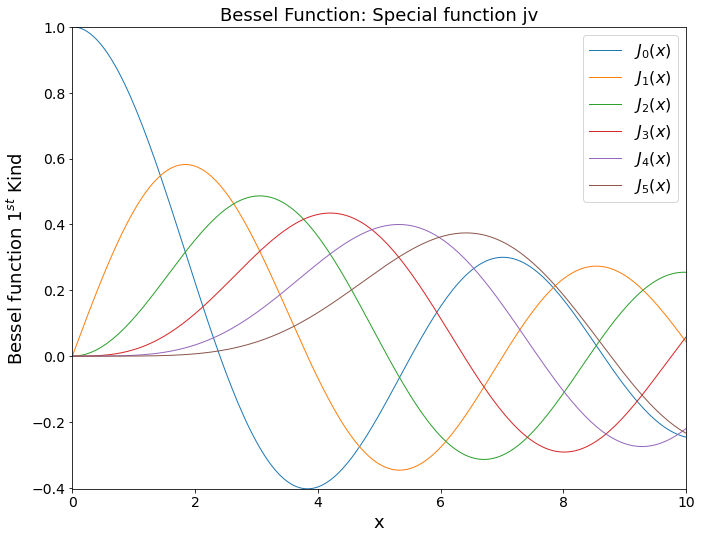

In [2]:
# Now generate plot values
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 8.5]
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 18

fig = plt.figure()
ax = plt.subplot(111)
for n in range(0,6):
    legnd = "$J_"+str(n)+"(x)$"
    plt.plot(xt,jv(n,xt),label=legnd)

ax.autoscale(enable=True, axis='both', tight=True)    
plt.xlabel('x')
plt.ylabel('Bessel function $1^{st}$ Kind')
plt.legend();
plt.title('Bessel Function: Special function jv');


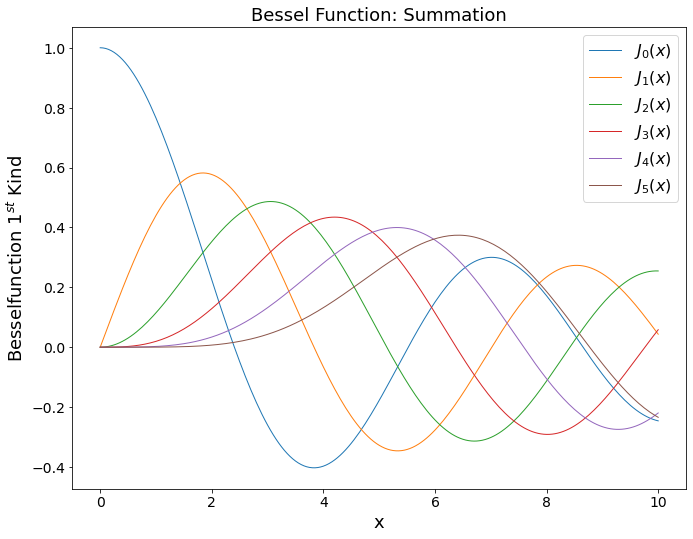


Bessel Function First Kind: Summation
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    x │    J_0(x) │    J_1(x) │   J_2(x)0 │    J_3(x) │    J_4(x) │    J_5(x) │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0.0 │  1.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  0.5 │  0.938470 │  0.242268 │  0.030604 │  0.002564 │  0.000161 │  0.000008 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.0 │  0.765198 │  0.440051 │  0.114903 │  0.019563 │  0.002477 │  0.000250 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.5 │  0.511828 │  0.557937 │  0.232088 │  0.060964 │  0.011768 │  0.001799 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2.0 │  0.223891 │  0.576725 │  0.352834 │  0.128943 │  0.033996 │  

In [3]:
## Part (3)
################################################
# Series expansion evaluation of Bessel function
################################################
import math

# dx = 0.05  # Due to difference from special.jv table we need to keep this value the same.

eps = 1e-7   # Sum terms until series contribution is < than eps.

xt = np.arange(0.0,10.0+dx,dx); nxt = np.size(xt)
sum_table = np.zeros((nxt,7));
sum_table[:,0] = xt 
sum_diff = np.zeros((nxt,7));
sum_diff[:,0] = xt 
maxm = 0

fig = plt.figure()
ax = plt.subplot(111)

for n in np.arange(0,6,1):
    Jn = np.zeros(nxt)
    for m in range(30):
        dJn = (-1)**m/(math.factorial(m)*math.factorial(n+m))*(xt/2)**(n+2*m)
        Jn = Jn + dJn
        maxm = m if m > maxm else maxm # Save max m needed in summations
        if abs(dJn[-1]) < eps:  # Only add as many terms as needed.
            break
            
    legnd = "$J_"+str(n)+"(x)$"
    plt.plot(xt,Jn,label=legnd)
    sum_table[:,n+1] = Jn
    sum_diff[:,n+1] = sum_table[:,n+1]-jv_table[:,n+1]
    
plt.xlabel('x')
plt.ylabel('Besselfunction $1^{st}$ Kind')
plt.legend();
plt.title('Bessel Function: Summation');
plt.show()

# Output table
fancy_headers = ["x", "J_0(x)","J_1(x)","J_2(x)0","J_3(x)","J_4(x)","J_5(x)"]
N = int(0.5/dx) # Spacing to have 0.5 output interval

print('\nBessel Function First Kind: Summation')
print(tabulate(sum_table[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))

print('\nDifference Summation solution - special.jv: ϵ ',eps,' Max m',maxm)
print(tabulate(sum_diff[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".3e",".3e",".3e",".3e",".3e",".3e")))

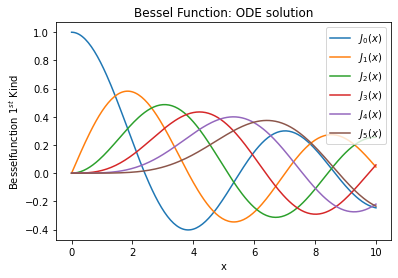


Bessel Function First Kind: ODE solution
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    x │    J_0(x) │    J_1(x) │   J_2(x)0 │    J_3(x) │    J_4(x) │    J_5(x) │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0.0 │  1.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  0.5 │  0.938470 │  0.242268 │  0.030604 │  0.002564 │  0.000161 │  0.000008 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.0 │  0.765198 │  0.440051 │  0.114903 │  0.019563 │  0.002477 │  0.000250 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.5 │  0.511828 │  0.557937 │  0.232088 │  0.060964 │  0.011768 │  0.001799 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2.0 │  0.223891 │  0.576725 │  0.352834 │  0.128943 │  0.033996 

x,$J_0(x)$,$J_1(x)$,$J_2(x)$,$J_3(x)$,$J_4(x)$,$J_5(x)$
0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
0.5,4.036e-08,8.323e-09,5.778e-08,2.589e-08,9.615e-09,2.118e-09
1.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
1.5,-2.794e-08,-2.951e-09,6.909e-09,3.739e-09,9.742e-09,8.863e-09
2.0,2.259e-08,-6.563e-09,4.274e-08,1.283e-08,3.999e-08,4.307e-08
2.5,3.087e-08,-6.563e-09,5.104e-08,5.133e-08,8.218e-08,1.327e-07
3.0,6.559e-08,-3.190e-08,4.007e-08,1.066e-07,1.558e-07,2.918e-07
3.5,6.082e-08,1.267e-08,2.700e-08,1.433e-07,2.759e-07,5.547e-07
4.0,4.879e-08,6.629e-08,1.402e-08,1.503e-07,3.875e-07,9.211e-07
4.5,3.913e-08,6.725e-08,1.369e-08,1.251e-07,4.633e-07,1.373e-06


In [2]:
## PART 3 Continued: Solution using differential equation solution.
################################################
# ODE solution for Bessel functions: 
################################################

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from tabulate import tabulate

# Equations are:
# x^2 d^2y/dx^2 + x dy/dx + (x^2-n^2) y = 0
# Create pair of first order equations
# z = dy/dx
# x^2 dz/dx + x dy/dx + (x^2-n^2) y = 0
# dz/dx = (-x dy/dx -  (x^2-n^2) y)/x^2
#        = -1/x dy/dx - (x^2-n^2)/x^2 y
#
# [dz/dx ; dy/dx ] = [ -1/x -(x^2-n^2)/x^2 ; 1 0 ] [dy/dx y]
#
# The code below is adapted from:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.06-Python-ODE-Solvers.html
#

x0 = 1.0  # Initial location to start integration (x1=0 has problems 
          # due to division by zero)
# dx = 0.05  # Due to difference from special.jv table we need to keep this value the same.
eps = 1e-7   # Set relative ans absolute error tolerance.  Looking at differences below
             # eps=1e-8 is neeed to retain 6-significant digits at x=10 and n=5.

# We will integation up and down from the initial value choosen.  (We could have 
# started at dx and only integrated up, see test code at bottom on notebook but
# technique used is likely more accurate.)
xu = np.arange(x0,10.0+dx,dx); nxu = np.size(xu)
xd = np.arange(x0,  0.0 ,-dx); nxd = np.size(xd)
xt = np.arange(0.0,10.0+dx,dx); nxt = np.size(xt) # This is sorted final table.
ode_table = np.zeros((nxt,7));
ode_table[:,0] = xt 
ode_diff = np.zeros((nxt,7));
ode_diff[:,0] = xt 

# lambda is a quick way to define a function that has only one-line of code.
# Here this is matrix multiply.  s is [y';y] and output in [y'';y']
F = lambda x, s: np.dot(np.array([[-1/x, -(x**2-n**2)/x**2], [1, 0]]), s)

fig = plt.figure()
ax = plt.subplot(111)

for n in np.arange(0,6,1):
    IV = 0.0 if n else 1.0 # Initial value at x=0 (this value not computed due to 1/x terms)
    IC = [jvp(n,x0),jv(n,x0)] # Initial conditions (use special function but we could have
                           # used the summation formula.  There is a derivative summation 
                           # formuala as well.  if x0 << 1 then only a few terms neeeded in
                           # the summation)   
   
    solu = solve_ivp(F, [xu[0],xu[-1]], IC, t_eval=xu, \
               rtol = eps, atol = eps)   # Solution integrating up to towrds 10.
    sold = solve_ivp(F, [xd[0],xd[-1]], IC, t_eval=xd, \
               rtol = eps, atol = eps)   # Solution integrating down towards zero.  Notice
                                         # that x=0 is not included due to divide by zero 
                                         # problem.
    downJ = np.flip(sold.y.T[:,1])       # Reverse downward integration is that x increases up.
    upJ = solu.y.T[1:,1]                 # Up solution; Start at one because IC already in down
                                         # ward array.
    allJ = np.concatenate((np.array([IV]),downJ, upJ))  # Creat whole xt array.

    legnd = "$J_"+str(n)+"(x)$"
    plt.plot(xt,allJ,label=legnd)
    ode_table[:,n+1] = allJ   # Add colum to table. 
    ode_diff[:,n+1] = ode_table[:,n+1]-jv_table[:,n+1]  # Compute difference from special.jv 
    
plt.xlabel('x')
plt.ylabel('Besselfunction $1^{st}$ Kind')
plt.legend();
plt.title('Bessel Function: ODE solution');
plt.show()

# Output table
fancy_headers = ["x", "J_0(x)","J_1(x)","J_2(x)0","J_3(x)","J_4(x)","J_5(x)"]
N = int(0.5/dx) # Spacing to have 0.5 output interval

print('\nBessel Function First Kind: ODE solution')
print(tabulate(ode_table[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))

print('\nDifference ODE solution - special.jv: ϵ ',eps)
print(tabulate(ode_diff[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".3e",".3e",".3e",".3e",".3e",".3e")))

#################
## Pandas dataframe display highlighting values that exceed 10*eps tolerance
#################
import pandas as pd
df = pd.DataFrame(ode_diff[0::N], \
                  columns=['x', '$J_0(x)$', '$J_1(x)$','$J_2(x)$','$J_3(x)$','$J_4(x)$','$J_5(x)$',])

def abs_err(v, props=''):
    return props if abs(v) > eps*10 and v<0.1 else None

mapper =  {'x': '{0:.1f}',
           '$J_0(x)$'  : '{0:.3e}',
           '$J_1(x)$'  : '{0:.3e}',
           '$J_2(x)$'  : '{0:.3e}',
           '$J_3(x)$'  : '{0:.3e}',
           '$J_4(x)$'  : '{0:.3e}',
           '$J_5(x)$'  : '{0:.3e}'}


df.style.hide_index().applymap(abs_err, props='color:red;').format(mapper)\
        .set_caption("Error in ODE Bessel Functions")

In [3]:
## PART 4: Use recursion algorithm. 
# use special.jv to generate J_0 amnd J_1 to start the recursion
# No plots in this case.
########################################
# Recusive solution
########################################
# J_{n+1} = 2n/x J_n(x)-J_{n-1}(x)
# x = 0 will ne an issue
xt = np.arange(0.,10.+dx,dx); nxt = np.size(xt)
rec_table = np.zeros((np.size(xt),7));
rec_table[:,0] = xt 
rec_diff = np.zeros((np.size(xt),7));
rec_diff[:,0] = xt
k = 0;
# Use the special jv function to generate the J_0 and J_1 values
rec_table[:,1] = jv(0,xt) ; rec_table[:,2] = jv(1,xt) 
rec_diff[:,1] = 0 ; rec_diff[:,2] = 0 
for n in range(1,5) :
    # Generate n+1 term (Saved into n+2 slot because xt in first column)
    # Start at second element so that x=0 is not in the calculation.
    # All terms are zero except J_0
    rec_table[1:,n+2] = 2*n*rec_table[1:,n+1]/xt[1:] - rec_table[1:,n] 

    rec_diff[:,n+2] =  rec_table[:,n+2] - jv_table[:,n+2]

fancy_headers = ["x", "J_0(x)","J_1(x)","J_2(x)0","J_3(x)","J_4(x)","J_5(x)"]
N = int(0.5/dx) # Spacing to have 0.5 output interval

print('\nBessel Function First Kind: Recursion solution')
print(tabulate(rec_table[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))

print('\nDifference recursion solution - special.jv')
print(tabulate(rec_diff[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".3e",".3e",".3e",".3e",".3e",".3e")))


Bessel Function First Kind: Recursion solution
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    x │    J_0(x) │    J_1(x) │   J_2(x)0 │    J_3(x) │    J_4(x) │    J_5(x) │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0.0 │  1.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │  0.000000 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  0.5 │  0.938470 │  0.242268 │  0.030604 │  0.002564 │  0.000161 │  0.000008 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.0 │  0.765198 │  0.440051 │  0.114903 │  0.019563 │  0.002477 │  0.000250 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.5 │  0.511828 │  0.557937 │  0.232088 │  0.060964 │  0.011768 │  0.001799 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2.0 │  0.223891 │  0.576725 │  0.352834 │  0.128943 │  0.0

In [5]:
## PART 5: Use the θ integral appproach
# Just tablulate values no plot since all look the same.
################################################
# Integal solution for Bessel functions: 
################################################

import scipy.integrate as solve_ivp
import scipy.special as special

eps = 1e10   # Use to set accuracy of quad integration. Works well; all errors at
             # double precison so not sure epsabs and epsrel do anything.  Setting
             # eps 1e-1 changes errors slightly but still of order 1e-14

xt = np.arange(0.,10.+dx,dx) # This array has to match jv calculation so that
                             # differences can be computed.
int_table = np.zeros((np.size(xt),7));
int_table[:,0] = xt 
int_diff = np.zeros((np.size(xt),7));
int_diff[:,0] = xt
k = 0;
for n in range(6) :
    k = 0
    for x in xt:
        result = solve_ivp.quad(lambda θ : np.cos(x*np.sin(θ)-n*θ)/np.pi, 0, np.pi, \
                       epsabs = eps, epsrel = eps)
        int_table[k,n+1] = result[0]
        int_diff[k,n+1] = result[0] - jv_table[k,n+1]
        k += 1

fancy_headers = ["x", "J_0(x)","J_1(x)","J_2(x)0","J_3(x)","J_4(x)","J_5(x)"]
N = int(0.5/dx) # Spacing to have 0.5 output interval

print('\nBessel Function First Kind: integral solution')
print(tabulate(int_table[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".6f",".6f",".6f",".6f",".6f",".6f")))

print('\nDifference integral solution - special.jv: ϵ ',eps)
print(tabulate(int_diff[0::N], fancy_headers, tablefmt="fancy_grid", \
               floatfmt=(".1f", ".3e",".3e",".3e",".3e",".3e",".3e")))


Bessel Function First Kind: integral solution
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    x │    J_0(x) │    J_1(x) │   J_2(x)0 │    J_3(x) │    J_4(x) │    J_5(x) │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0.0 │  1.000000 │  0.000000 │  0.000000 │ -0.000000 │ -0.000000 │  0.000000 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  0.5 │  0.938470 │  0.242268 │  0.030604 │  0.002564 │  0.000161 │  0.000008 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.0 │  0.765198 │  0.440051 │  0.114903 │  0.019563 │  0.002477 │  0.000250 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1.5 │  0.511828 │  0.557937 │  0.232088 │  0.060964 │  0.011768 │  0.001799 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2.0 │  0.223891 │  0.576725 │  0.352834 │  0.128943 │  0.03

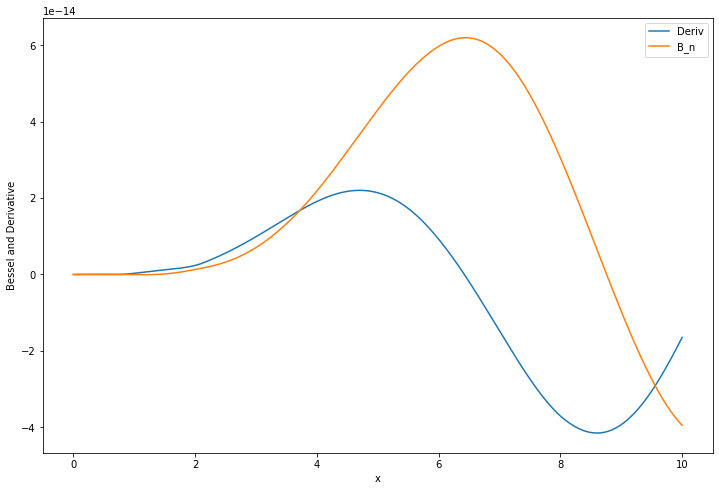

In [8]:
## TEST CODE for ODE solution exploring initial conditions and starting
# value of x0
################################################
# ODE solution for Bessel functions: Testing code
################################################

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Equations are:
# x^2 d^2y/dx^2 + x dy/dx + (x^2-n^2) y = 0
# Create pair of first order equations
# z = dy/dx
# x^2 dz/dx + x dy/dx + (x^2-n^2) y = 0
# dz/dx = (-x dy/dx -  (x^2-n^2) y)/x^2
#        = -1/x dy/dx - (x^2-n^2)/x^2 y
#
# [dz/dx ; dy/dx ] = [ -1/x -(x^2-n^2)/x^2 ; 1 0 ] [dy/dx y]

 
n = 5 ;     # Try different orders
x0 = 1.e-8  # Try redicing x0 to see what happens; keep an eye on the scale
            # The shape will OK but size amplitude will decrease of x0 < 1e-2.
IC = [jvp(n,x0),jv(n,x0)]        
F = lambda x, s: np.dot(np.array([[-1/x, -(x**2-n**2)/x**2], [1, 0]]), s)

t_eval = np.arange(x0, 10.0+2*x0, 0.01)
sol = solve_ivp(F, [x0, 10+2*x0], IC, t_eval=t_eval, \
               rtol = 1e-13, atol = 1e-15)

plt.figure(figsize = (12, 8))
plt.plot(sol.t, sol.y.T[:, 0], sol.t, sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('Bessel and Derivative')
plt.legend(['Deriv','B_n'])
plt.show()